# Abhinav Singh Katal
# Task2 - Unsupervised learning - K means Clustering

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Loading the iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

In [9]:
iris             # data is already present in the sklearn library in the array format

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [10]:
#Make a dataframe of the iris data
df_iris = pd.DataFrame(iris.data, columns = iris.feature_names)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
# As per the problem given, we have to find the optimum number of clusters for this data, i.e the k value.
# So we have to run a loop where we will be looking out for different values of wcss and k. wcss is within cluster sum of squares.
# So wcss is the sum of square of distance of each cluster from their data points.WCSS should be the least. That k point is what is optimum.

from sklearn.cluster import KMeans
x = iris.data
wcss = []
for i in range(1,21):
    kmeans = KMeans(n_clusters= i, init = 'k-means++', n_init = 10, max_iter = 300)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    

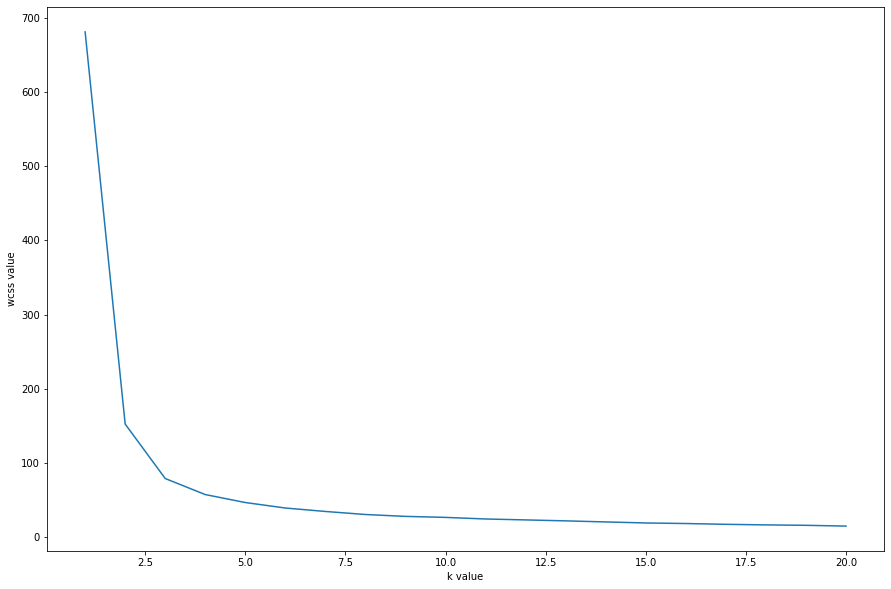

In [28]:
# Plotting the graph of wcss vs the k value
plt.figure(figsize = (15,10))
plt.plot(range(1,21), wcss)
plt.xlabel('k value')
plt.ylabel('wcss value')
plt.show()

In [ ]:
#It is clearly visible that the elbow is forming at k = 3 after which wcss is not abruptly decreasing. Hence k =3


In [30]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [31]:
y = kmeans.predict(x)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [59]:
kmeans.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [60]:

w = pd.DataFrame(kmeans.cluster_centers_) 
w

,0,1,2,3
0,5.006000,3.428000,1.462000,0.246000
1,5.901613,2.748387,4.393548,1.433871
2,6.850000,3.073684,5.742105,2.071053


In [62]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

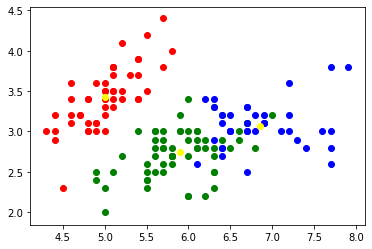

In [52]:
plt.scatter(x[y == 0,0], x[y == 0,1], c = 'red', label = 'Iris Setosa')
plt.scatter(x[y == 1,0], x[y == 1,1], c = 'green', label = 'Iris Versicolor')
plt.scatter(x[y == 2,0], x[y == 2,1], c = 'blue', label = 'Iris Virginica')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='yellow', label = 'Centroids')